 # Задание 1.1. Задача о падении тела

 ## Выполнение Задания 1.1

 #### Этап 1. Импортирование модулей

In [53]:
import math

In [54]:
math.sin(math.pi/2)

1.0

In [55]:
import numpy as np #супер жёсткая либа которая добавляет крутой массив 

In [56]:
import matplotlib.pyplot as plt #графики чертит

In [57]:
import scipy.constants as const #подмодуль скайпая имортировали

In [58]:
import sympy

 #### Этап 2. Создание переменных

In [59]:
h_start = 1 # вертикальная составляющая положения тела в момент запуска
h_end = 3.0E+0 # вертикальная составляющая положения тела в конечный момент движ
T = 3.0 # время полета
s_end = 5.0e0 # горизонтальное перемещение тела за время полета

In [60]:
h_start # переменная не отобразится
h_end # переменная отобразится

3.0

In [61]:
print(h_start, h_end)


1 3.0


In [62]:
g = const.g
g, const.unit('standard acceleration of gravity')

(9.80665, 'm s^-2')

In [63]:
e = const.e
h = const.h
e,h

(1.602176634e-19, 6.62607015e-34)

In [64]:
step = 0.01
t_list = [0 + i*step for i in range(int(T/0.01))]
t_array = np.arange(0,T,step) 

 ## Функция range принимает на вход до 3 аргументов для формирования последовательности чисел upd: при использовании вне цикла просто выводит тебе начало и конец вместо последовательности
 ### 1 аргумент выводит последовательность от 0 до n-1 где n—значение аргумента range(n)
 ### 2 аргумента выводит последовательность от a до b-1 range(a,b)
 ### 3 аргумента выводит последовательность от a до b-1 с шагом c, также можно выводить числа в обратном порядке указав шаг -1 и поменяв максимум и минимум местами, но нельзя просто указать шаг -1 как это делают в срезах у списков или строк бла-бла-бла[::-1] — в нашем случае нельзя так как программа не поймёт куда считать и выдаст ошибку(также при выводе наоборот программа не выведет границу b) range(a,b,c) если число лежит вне диапазона b то питон его не выводит 

 ## arange — функция numpy которая заключает заданную последовательность в массив numpy
 ### 1 аргумент массив от 1 до n-1 np.arange(n)
 ### 2 аргумента массив от a до b-1 np.arange(a,b)
 ### 3 аргумента массив от a до b-1 с шагом c np.arange(a,b,c) 
 ###### смотри спецификацию range

In [65]:
for i in range(5,1,-1):
    print(i)

np.arange(5)

5
4
3
2


array([0, 1, 2, 3, 4])

In [66]:
?range 

Init signature: range(self, /, *args, **kwargs)
Docstring:     
range(stop) -> range object
range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
These are exactly the valid indices for a list of 4 elements.
When step is given, it specifies the increment (or decrement).
Type:           type
Subclasses:     

 #### Этап 3. Определение функции перемещения и нахождение угла запуска тела

 ### с помощью закона сохранения импульса находим скорость и начальная координата нам дана а ускорение находим из 2 закона Ньютона

In [67]:
v0_x = s_end/T
v0_x

1.6666666666666667

In [68]:
v0_y = (h_end-h_start+g/2*T**2)/T
v0_y

15.376641666666666

In [69]:
alpha = math.atan(v0_y/v0_x)
alpha, math.degrees(alpha)

(1.462828312588189, 83.81388846354714)

In [70]:
f's_x(t) = {v0_x} t'

's_x(t) = 1.6666666666666667 t'

In [71]:
f's_y(t) = {h_start} + {v0_y:.6} t - {g:.6}/2*t\N{superscript two}'


's_y(t) = 1 + 15.3766 t - 9.80665/2*t²'

 # Этап 4. Построение графика траектории движения тела


In [72]:
t_list, t_array; # символ ; в конце выражения предотвращает вывод результата

In [73]:
s_x_list = [v0_x*t for t in t_list]
s_y_list = [h_start+v0_y*t-g*t**2/2 for t in t_list]

In [74]:
s_x_array = v0_x*t_array
s_y_array = h_start+v0_y*t_array-g*t_array**2/2

(0.0, 5.0, 0.0, 14.0)

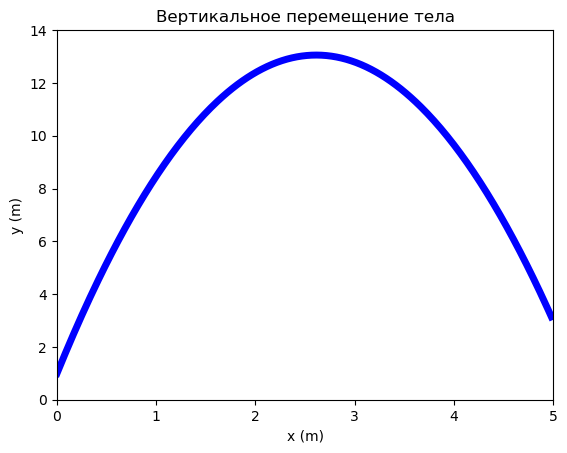

In [75]:
plt.figure()
plt.plot(s_x_list,s_y_list,'b-',lw=5)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)') # символ ; позволяет записывать несколь
plt.axis([0, s_end, 0, h_end+11])

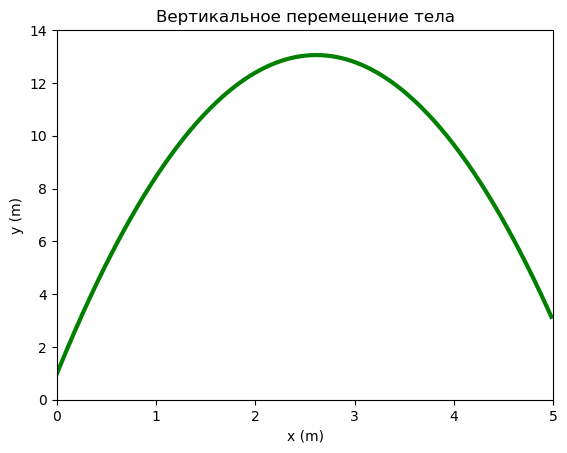

In [76]:
plt.figure()
plt.plot(s_x_array,s_y_array,color='green',lw=3)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')
# альтернативный синтаксис для установки пределов по осям
plt.xlim(0, s_end)
plt.ylim(0, h_end+11);

 ## Задание 1.2. Определение момента времени касания телом земли


 ### Выполнение Задания 1.2

In [77]:
t = sympy.symbols('t')
result = sympy.solve(h_start+v0_y*t-g*t**2/2, t)
result

[-0.0637382309488101, 3.19970039267921]

In [78]:
t_star_exact = result[-1]
t_star_exact

3.19970039267921

In [79]:
#?sympy.solve, насмотрелся 

 ## Задание 1.3. Построение секущей, касательной и нормали к графику функции

### Выполнение Задания 1.3

In [80]:
p_start = np.array([s_x_array[0],s_y_array[0]])
p_end = np.array([s_x_array[-1],s_y_array[-1]])
p_start, p_end

(array([0., 1.]), array([4.98333333, 3.13994275]))

In [81]:
a = p_end-p_start

In [82]:
p = [p_start + a*t for t in [-1, 2]]
p = np.array(p)

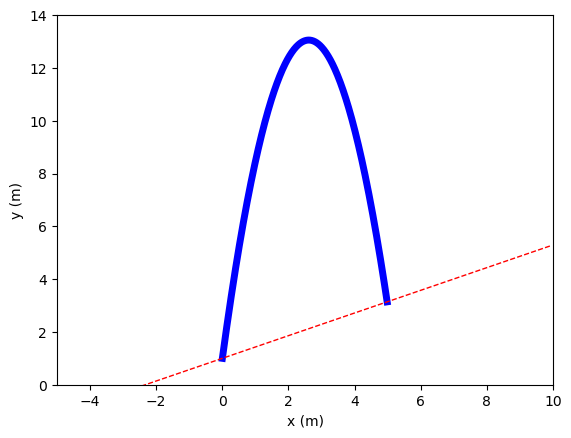

In [83]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=5)
plt.plot(p[:,0],p[:,1],'--',color='red',lw=1) # обратите внимание не специальную
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-5, s_end+5, 0, h_end+11]);

 ### Задание 1.4. Построение графиков функций

 ### Пример

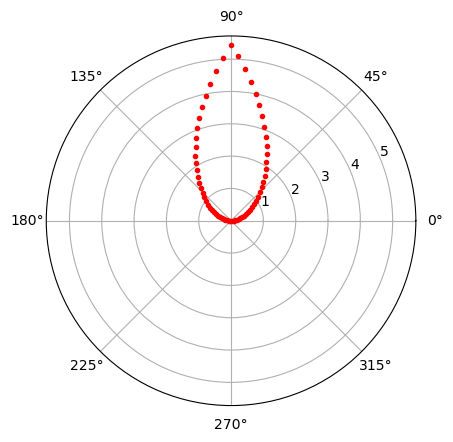

In [84]:
plt.figure()
# установка способа отображения осей
plt.axes(projection='polar')
# подготовка данных
phi = np.arange(-np.pi/2, np.pi/2, 0.05)
r = phi**3+phi
# построение графика
plt.plot(phi + (r<0)*np.pi,abs(r),'r.');

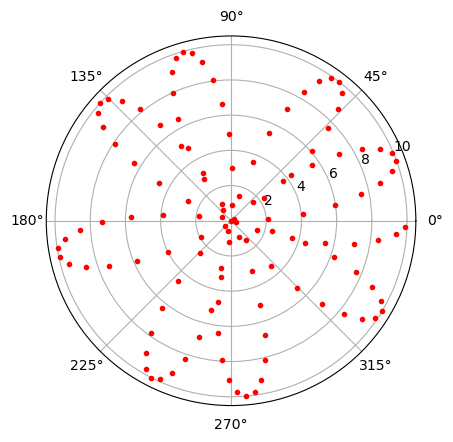

In [113]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(0, 2*np.pi, 0.05)
m = 85
n = 20
a = 10

if m != n and m > 0 and n > 0:
    r = a * np.sin((m/n) * phi)
    adjusted_phi = np.where(r < 0, phi + np.pi, phi)
    adjusted_r = np.abs(r)
    plt.plot(adjusted_phi, adjusted_r, 'r.')

plt.show()

(Text(0.5, 0, 'x'), Text(0, 0.5, 'y'))

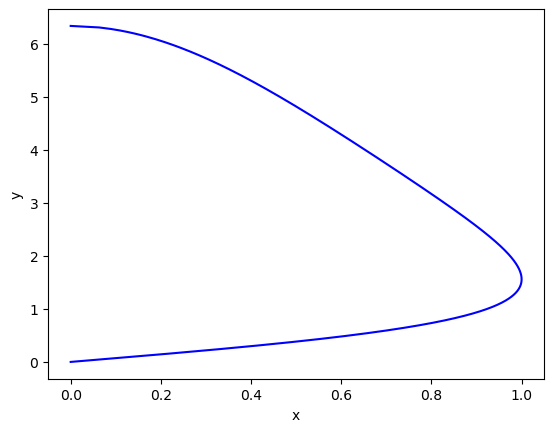

In [122]:
t = np.linspace(-1, 1, 1000)  
x = np.sqrt(1 - t**2)
y = np.tan(np.sqrt(1 + t))

plt.figure()
plt.plot(x, y, 'b-')
plt.xlabel('x'),plt.ylabel('y')
